# ADAPT Pro - Web Scraping on Athena
see: https://jpmc.stackenterprise.co/questions/279/290#290

- you need to first connect to the website using the requests library and provide a proxies variable in the `requests.get()` function
- sometimes you also need to provide a `headers` variable (see example below on Yahoo Finance)

## Scraping Table from Website with Pandas
- use requests to connect to website through proxy
- use pandas to covert html table into a DataFrame with `read_html()`
    - read_html creates a list of dataframes, you then need to put out the one you want

In [1]:
import requests
import pandas as pd
proxies = { 'http' : 'http://proxy.jpmchase.net:8443/', 'https' : 'http://proxy.jpmchase.net:8443/' }

In [2]:
url = 'https://www.iposcoop.com/last-100-ipos/'
res = requests.get( url, proxies = proxies )

ipos = pd.read_html(res.text)[0]
# ipos
# ipos.info()

In [3]:
url = 'https://www.iposcoop.com/last-100-ipos/'
res = requests.get( url, proxies = proxies )

## Scraping Multiple Tables with Pandas


In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
res = requests.get(url, proxies = proxies)
dfs = pd.read_html(res.text)
len(dfs), type(dfs)

In [5]:
sp500_data = dfs[0]
sp500_data.head()

**Scraping with Headers**
- some websites require headers with at least a User Agent to provide more details about your device
- can find your actual User-Agent here: https://www.whatismybrowser.com/detect/what-is-my-user-agent/

https://finance.yahoo.com/quote/TSLA/key-statistics?p=TSLA
- has multiple tables

In [6]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'
}

In [7]:
url = 'https://finance.yahoo.com/quote/AAPL/key-statistics?p=AAPL'
res = requests.get(url, headers=headers, proxies = proxies )

dfs = pd.read_html(res.text)
# dfs
valMeasures = dfs[0]
valMeasures
# dfs[1] #to see all the tables

In [8]:
dfs[3] #dividend table

## Scraping CSV/Excel Files Directly with Pandas
- on home device can scrape url of csv directly with read_csv
- on Athena need to use the io library

In [9]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=959&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GNPCA&scale=left&cosd=1929-01-01&coed=2022-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-04-25&revision_date=2023-04-25&nd=1929-01-01'

In [10]:
import io
s = requests.get(url, proxies=proxies).text
df = pd.read_csv(io.StringIO(s))

In [11]:
df.head()

## Scraping with JSON
- some websites require headers for the requests formula (e.g. Yahoo Finance)

In [12]:
import requests
proxies = { 'http' : 'http://proxy.jpmchase.net:8443/', 'https' : 'http://proxy.jpmchase.net:8443/' }
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'
}

In [13]:
url = 'https://query2.finance.yahoo.com/v7/finance/quote?symbols=tsla'
response = requests.get(url, headers=headers, proxies=proxies)

In [14]:
# response.text

In [15]:
df = pd.read_json(response.text)
df

In [16]:
aapl = pd.DataFrame(df.loc['result'][0])
aapl

In [17]:
aapl['ask']

## Scraping Multiple JSON files

In [18]:
#ADD THESE AT TOP OF YOUR NOTEBOOK
import requests
proxies = { 'http' : 'http://proxy.jpmchase.net:8443/', 'https' : 'http://proxy.jpmchase.net:8443/' }
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'
}

#Replicating for multiple tickers
tickers = ['AAPL', 'MSFT', 'TSLA', 'BA', 'META']
def pullYFinJSON(ticker):
    url = "https://query2.finance.yahoo.com/v7/finance/quote?symbols=" + ticker
    response = requests.get(url, headers=headers, proxies=proxies) #NEW CODE
#     df = pd.read_json(url) #OLD
    df = pd.read_json(response.text) #NEW CODE
    df = pd.DataFrame(df.loc['result'][0])
    df.set_index('symbol', inplace=True) #renaming index as the ticker to keep track of data
    return df

outputs = pd.DataFrame() #empty table
for ticker in tickers:
    tickerData = pullYFinJSON(ticker)
    outputs = pd.concat([outputs, tickerData])

In [19]:
outputs

In [20]:
#to export back into excel
outputs.to_excel('yahoo finance.xlsx')

In [21]:
#to extract data
outputs.loc['MSFT']['regularMarketPrice']

## Scraping JSON Files with CURL
- find the JSON file on the Network --> XHR tab using the steps discussed in class
- copy/paste the CURL Bash in a CURL converter website such as:
    - https://www.scrapingbee.com/curl-converter/python/
- copy the Python code output, add the proxies if running on Athena
- add code to convert to JSON and then DataFrame

**Demo - LifeMark Locations**

In [22]:
#CODE copied from Curl converter 
#Replace cookies below with own cookies

import requests

cookies = {
    '_mkto_trk': 'id:329-QRK-460&token:_mch-www.lifemark.ca-1664534245114-41095',
    '_ga': 'GA1.3.1126905227.1664534258',
    '__adroll_fpc': 'a42dcf763a181c7f934cff926761ee2d-1664534261622',
    'refer_tracking': '%7B%22utm_source%22%3A%22google%22%2C%22utm_medium%22%3A%22organic%22%2C%22utm_content%22%3A%22None%22%2C%22utm_campaign%22%3A%22None%22%7D',
    'SSESS4fdb616e5db174181fd6a90b9ddbc286': 'IJURjV4xYtIus2NiEuH4ggNuLkhn5VGbbASZ8_hRhmQ',
    '__cflb': '0H28vCKPfwtxZg8t9TpNQpsnRUc8UMjtUt2jMmniS4U',
    '_gid': 'GA1.3.1428454953.1682397758',
    '_gat': '1',
    '_gcl_au': '1.1.1907727603.1682397758',
    '_ga': 'GA1.1.1126905227.1664534258',
    'calltrk_referrer': 'https%3A//www.google.com/',
    'calltrk_landing': 'https%3A//www.lifemark.ca/locations',
    '__ar_v4': '%7CIHBITIW7HFFGFI3FIV2BRK%3A20230425%3A1%7COBMQYICQ5RCFROKGB7HAB7%3A20230425%3A1%7CY67X6CSBZREERIK73QFYXP%3A20230425%3A1',
    '_ga_T97HKMXPMG': 'GS1.1.1682397757.1.0.1682397766.0.0.0',
}

headers = {
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    'Accept-Language': 'en-US,en;q=0.9',
    'Connection': 'keep-alive',
    'Content-Type': 'application/x-www-form-urlencoded; charset=UTF-8',
    # Requests sorts cookies= alphabetically
    # 'Cookie': '_mkto_trk=id:329-QRK-460&token:_mch-www.lifemark.ca-1664534245114-41095; _ga=GA1.3.1126905227.1664534258; __adroll_fpc=a42dcf763a181c7f934cff926761ee2d-1664534261622; refer_tracking=%7B%22utm_source%22%3A%22google%22%2C%22utm_medium%22%3A%22organic%22%2C%22utm_content%22%3A%22None%22%2C%22utm_campaign%22%3A%22None%22%7D; SSESS4fdb616e5db174181fd6a90b9ddbc286=IJURjV4xYtIus2NiEuH4ggNuLkhn5VGbbASZ8_hRhmQ; __cflb=0H28vCKPfwtxZg8t9TpNQpsnRUc8UMjtUt2jMmniS4U; _gid=GA1.3.1428454953.1682397758; _gat=1; _gcl_au=1.1.1907727603.1682397758; _ga=GA1.1.1126905227.1664534258; calltrk_referrer=https%3A//www.google.com/; calltrk_landing=https%3A//www.lifemark.ca/locations; __ar_v4=%7CIHBITIW7HFFGFI3FIV2BRK%3A20230425%3A1%7COBMQYICQ5RCFROKGB7HAB7%3A20230425%3A1%7CY67X6CSBZREERIK73QFYXP%3A20230425%3A1; _ga_T97HKMXPMG=GS1.1.1682397757.1.0.1682397766.0.0.0',
    'Origin': 'https://www.lifemark.ca',
    'Referer': 'https://www.lifemark.ca/locations',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
    'sec-ch-ua': '"Google Chrome";v="111", "Not(A:Brand";v="8", "Chromium";v="111"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
}

data = {
    'address': '',
    'lat': '51.5621883',
    'lng': '-88.2596971',
    'max_kilometers': '1000000',
    'result_limit': '350',
    'services': '[]',
    'provinces': '[]',
    'current_path': 'locations',
}

# response = requests.post('https://www.lifemark.ca/locations/searchcallback', cookies=cookies, headers=headers, data=data)
response = requests.post('https://www.lifemark.ca/locations/searchcallback',
                         proxies=proxies,
                         cookies=cookies,
                         headers=headers, data=data)

In [23]:
#CODE not generated by CURL converter
data = response.json()
# data # need to go into 'results' key
df = pd.DataFrame(data['results'])
df.head()

**Demo - CVC Portfolio**
- try with CVC portfolio of investments:
https://www.cvc.com/strategies/our-portfolio/

In [24]:
import requests

cookies = {
    'CookieControl': '{"necessaryCookies":["XSRF-V","XSRF-TOKEN","UMB_UCONTEXT","UMB_UPDCHK","UMB-XSRF-TOKEN","alertsFormVals"],"optionalCookies":{"analytics":"accepted"},"statement":{},"consentDate":1682398166418,"consentExpiry":90,"interactedWith":true,"user":"9BAC7897-9481-4878-B3CB-5471CE12D953"}',
    '_gid': 'GA1.2.1506761338.1682398167',
    '_gat_UA-21900355-1': '1',
    '_ga': 'GA1.1.808752660.1682398167',
    '_ga_VVKFQTL0H0': 'GS1.1.1682398211.1.1.1682398224.0.0.0',
}

headers = {
    'Accept': '*/*',
    'Accept-Language': 'en-US,en;q=0.9',
    'Connection': 'keep-alive',
    # Requests sorts cookies= alphabetically
    # 'Cookie': 'CookieControl={"necessaryCookies":["XSRF-V","XSRF-TOKEN","UMB_UCONTEXT","UMB_UPDCHK","UMB-XSRF-TOKEN","alertsFormVals"],"optionalCookies":{"analytics":"accepted"},"statement":{},"consentDate":1682398166418,"consentExpiry":90,"interactedWith":true,"user":"9BAC7897-9481-4878-B3CB-5471CE12D953"}; _gid=GA1.2.1506761338.1682398167; _gat_UA-21900355-1=1; _ga=GA1.1.808752660.1682398167; _ga_VVKFQTL0H0=GS1.1.1682398211.1.1.1682398224.0.0.0',
    'Referer': 'https://www.cvc.com/strategies/our-portfolio/?strategy=Europe/Americas&country=all&industries=all&cardName=null',
    'Sec-Fetch-Dest': 'empty',
    'Sec-Fetch-Mode': 'cors',
    'Sec-Fetch-Site': 'same-origin',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest',
    'sec-ch-ua': '"Google Chrome";v="111", "Not(A:Brand";v="8", "Chromium";v="111"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
}

params = {
    'pageKey': '76273fbf-2d9e-4bb4-8630-70903f7a0cef',
    'strategy': 'all',
    'country': 'all',
    'industries': 'all',
}

# response = requests.get('https://www.cvc.com/umbraco/Surface/LocationItems/PortfolioMapItems', params=params, cookies=cookies, headers=headers)
response = requests.get('https://www.cvc.com/umbraco/Surface/LocationItems/PortfolioMapItems', 
                        params=params,
                        cookies=cookies,
                        headers=headers,
                       proxies=proxies) #add proxies

In [25]:
data = response.json()
len(data)

In [26]:
df = pd.DataFrame(data)
df.set_index('Name').head()

## Scraping with JSON API
- usully require a TOKEN
- documentation provides examples to try out
- steps to convert to dataframe are similar to regular JSON scrape

Examples of APIs:
- FRED St. Louis Fed API: https://fred.stlouisfed.org/docs/api/fred/
    - request your own API key: https://fred.stlouisfed.org/docs/api/api_key.html

### FRED API
- *change the API token below with your own API key*
- observations series: https://fred.stlouisfed.org/docs/api/fred/series_observations.html
    - start with base URL
    - add API key: `api_key=xxxxx....xxxx`
    - add file type, e.g. json: `&file_type=json`
    - add series ID: `series_id=`
    - add frequency, e.g. d for daily, m for monthly, etc.: `&frequency=m`
    

**PLEASE REPLACE API KEY BELOW WITH YOUR OWN KEY**
- https://fred.stlouisfed.org/docs/api/api_key.html

In [27]:
apiKey = '&api_key=2080f5d1960f074428e503fd03e71960'
# apiKey = 'replace with your own API KEY'

In [28]:
rootURL = 'https://api.stlouisfed.org/fred/series/observations?series_id='
seriesID = 'GNPCA' #https://fred.stlouisfed.org/series/GNPCA, real gross national product
fileType = '&file_type=json'
freq = '&frequency=a' #annual

url = rootURL + seriesID + apiKey + fileType + freq
req = requests.get(url, proxies=proxies)
data = req.json()

In [29]:
# data
df = pd.DataFrame(data['observations'])
# df.head()
# df.info()
df['date'] = pd.to_datetime(df['date'])
df['value'] = df['value'].astype(float)

In [30]:
df.plot(x='date',y='value', title='Annual Real Gross National Product (GNPCA)')

### EDGAR API
- documentation: https://www.sec.gov/edgar/sec-api-documentation
- need to grab proper cik of company you want to scrape
    - list of all CIKs can be found here: https://sec.gov/files/company_tickers.json
    - however, need to add leading 0's, 10 digits total
    - e.g. Apple is not 320193, it is, '0000320193'

**List of CIKs**

In [31]:
#list of all CIKs
url='https://sec.gov/files/company_tickers.json'
response = requests.get(url, headers=headers, proxies=proxies)
data = response.json()
df = pd.DataFrame(data).T
df.head()

**Submissions Information**
- filing history is available at: https://data.sec.gov/submissions/CIK##########.json

In [32]:
cik = '0000320193' #Apple
url = 'https://data.sec.gov/submissions/CIK{}.json'.format(cik)
response = requests.get(url, headers=headers, proxies=proxies)
data = response.json()
# data
data['name']

**Available KPIs**
- list of all kpi's/accounting metrics that can be extracted: https://data.sec.gov/api/xbrl/companyfacts/CIK##########.json
- easier to see what the kpi is called by looking at interactive data:
    - https://www.sec.gov/Archives/edgar/data/320193/000032019323000006/0000320193-23-000006-index.htm
    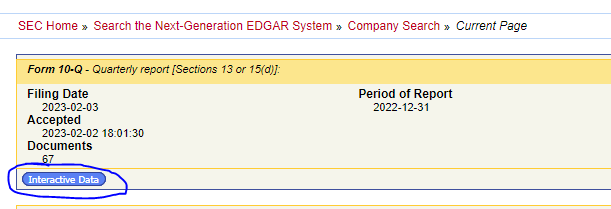
    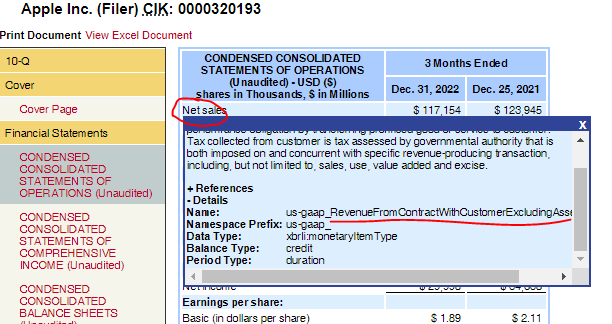

In [33]:
url = 'https://data.sec.gov/api/xbrl/companyfacts/CIK{}.json'.format(cik)
response = requests.get(url, headers=headers, proxies=proxies)
data = response.json()
# data
kpis = pd.DataFrame(data['facts']['us-gaap']).T
kpis.head()

**Pulling in historical metrics**
- e.g.: https://data.sec.gov/api/xbrl/companyconcept/CIK##########/us-gaap/AccountsPayableCurrent.json

In [34]:
# kpi = 'AccountsPayableCurrent'
kpi = 'RevenueFromContractWithCustomerExcludingAssessedTax'
url = 'https://data.sec.gov/api/xbrl/companyconcept/CIK{}/us-gaap/{}.json'.format(cik, kpi)
response = requests.get(url, headers=headers, proxies=proxies)
data = response.json()
df = pd.DataFrame(data['units']['USD'])
df.tail(10)
# data

## Scraping with Beautiful Soup
1. Connect to website
    - use requests to connect to URL
    - convert code into "soup" object with `BeautifulSoup` function
2. Find Web Elements
    - find the tag type and attributes (e.g. class, id, etc.)
3. Extract Web Elements
    - usually find all the major sections and loop through each section
    - save all individual pieces of information in separate lists
4. Save lists into a dataframe table
    - convert all the lists into a dataframe by using a dictionary where keys = column names, values = lists you created with data for each column
    - e.g. `pd.DataFrame({'Company':listcompanies, 'Link':listlinks})`

### Demo with J.P. Morgan News Articles

**Step 1 - connect to website**

In [35]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [36]:
url = 'https://www.jpmorgan.com/news'
response = requests.get(url, headers=headers, proxies=proxies)

In [37]:
soup = BeautifulSoup(response.text)

**Step 2 - find web elements**
- major article sections --> div, class=item
- titles of each article --> div, class=title
- links --> a, can use href to grab the links
- dates --> div, class=date

**Step 3 - extract web elements**

In [38]:
sections = soup.find_all('div', {'class':'item'})
len(sections)

In [39]:
#create lists
titles = []
dates = []
links = []
for section in sections:
    titleTag = section.find('div',{'class':'title'})
    dateTag = section.find('div',{'class':'date'})
    linkTag = section.find('a')
    titles.append(titleTag.text.strip())
    dates.append(dateTag.text.strip())
    links.append(linkTag['href'])

**Step 4 - create dataframe**

In [40]:
articles = pd.DataFrame({'Title':titles,
                        'Date':dates,
                        'Link':links})

In [41]:
articles.head()

### Demo with Marquee Upcoming Evenets

In [42]:
#Step 1 - connect to site
url = 'https://marqueegroup.ca/events/'
response = requests.get(url, headers=headers, proxies=proxies)
soup = BeautifulSoup(response.text)

In [43]:
#Step 2 - find tags
#section - div, card__content
#date - div, event__date
#title - div, title-6 event__title
#description - p, small event__description
#location - div, event__location
#register link - span, link fancy-link regist#er

In [44]:
#Step 3 - extract elements
courses = {'Event Date':[],
          'Course Name':[],
          'Description':[],
          'Location':[],
          'Link':[]}

sections = soup.find_all('div',{'class':'card__content'})
len(sections)

In [45]:
for section in sections:
    date = section.find('div',{'class':'event__date'})
    title = section.find('div',{'class':'title-6 event__title'})
    desc = section.find('p',{'class':'small event__description'})
    location = section.find('div',{'class':'event__location'})
    link = section.find('span',{'class':'link learn-more'})
    
    courses['Event Date'].append(date.text)
    courses['Course Name'].append(title.text)
    courses['Description'].append(desc.text.strip())
    courses['Location'].append(location.text)
    if link:
        courses['Link'].append(link['href'])
    else:
        courses['Link'].append('n.a.')

In [46]:
#Step 4 - create table
coursesTable = pd.DataFrame(courses)
coursesTable